In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

In [ ]:
import sys
from pygv.viewer import GenomeViewer
from pygv.tracks import bigwig_track, logo_track, bed_track

In [ ]:
sys.path.append("/local/storage/ly349/projects/Deconvolution/Notebooks/")
from customized_styles import _pos_color, _neg_color
from utils import get_bioqueue_file

In [ ]:
gv_obj = GenomeViewer(inward_ticks=True, n_ticks=3)
rgv_obj = GenomeViewer(inward_ticks=True, n_ticks=3)
_cell_labels = ("K562", "GM12878", "MCF7")
j = 1
idxs = (0, 1, 2)
for gv_idx, gv in enumerate((gv_obj, rgv_obj)):
    for i, label in enumerate(_cell_labels):
        _target = bigwig_track.PairedStrandSpecificTracks(
            get_bioqueue_file("{{History:12347-%s.ds.pl.bw}}" % label),
            get_bioqueue_file("{{History:12347-%s.ds.mn.bw}}" % label),
            name="PRO-cap" if gv_idx == 0 else "", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", height=0.8, 
        )
        if j: _target.data_transform = "asinh"
        gv.add_track(_target)
        
        # replicates will be averaged
        _pred = bigwig_track.PairedStrandSpecificTracks(
            (
                get_bioqueue_file("{{History:18785-log_r1/%s.pl.bw}}" % label.lower()),
                get_bioqueue_file("{{History:18785-log_r2/%s.pl.bw}}" % label.lower()),
                get_bioqueue_file("{{History:18785-log_r3/%s.pl.bw}}" % label.lower()),
            ), 
            (
                get_bioqueue_file("{{History:18785-log_r1/%s.mn.bw}}" % label.lower()),
                get_bioqueue_file("{{History:18785-log_r2/%s.mn.bw}}" % label.lower()),
                get_bioqueue_file("{{History:18785-log_r3/%s.mn.bw}}" % label.lower()),
            ),
            name="Seq only" if gv_idx == 0 else "", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", height=0.8, 
        )
        if j: _pred.data_transform = "asinh"
        gv.add_track(_pred)
    
        _pred = bigwig_track.PairedStrandSpecificTracks(
            (
                get_bioqueue_file("{{History:18787-log_r1/%s.pl.bw}}" % label.lower()),
                get_bioqueue_file("{{History:18787-log_r2/%s.pl.bw}}" % label.lower()),
                get_bioqueue_file("{{History:18787-log_r3/%s.pl.bw}}" % label.lower()),), 
            (
                get_bioqueue_file("{{History:18787-log_r1/%s.mn.bw}}" % label.lower()),
                get_bioqueue_file("{{History:18787-log_r2/%s.mn.bw}}" % label.lower()),
                get_bioqueue_file("{{History:18787-log_r3/%s.mn.bw}}" % label.lower()),
            ),
            name="Fused" if gv_idx == 0 else "", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", height=0.8, 
        )
        if j: _pred.data_transform = "asinh"
        gv.add_track(_pred)
    
        _motif = logo_track.DynseqTrack(
            (
                get_bioqueue_file("{{History:18791-attr/ixg-v020-3d1-procap-all-seqonly-counts.C%d.bw}}" % i),
                get_bioqueue_file("{{History:18792-attr/ixg-v020-3d1-procap-all-seqonly-counts-r1.C%d.bw}}" % i),
                get_bioqueue_file("{{History:18793-attr/ixg-v020-3d1-procap-all-seqonly-counts-r2.C%d.bw}}" % i),
            ),
            "/media/volume/sdb/refs/sequences/human/GRCh38_no_alt_analysis_set_GCA_000001405.15.22X.fasta",
            name="Seq only" if gv_idx == 0 else "", line_width=0, height=0.7, y_tick_format="{:0.1f}")
        _motif.data_transform = "asinh"
        gv.add_track(_motif)
    
        _motif.set_highlight_regions(
            [
                3772445, # ETS hit
                3772481, # SP1 hit
                3774911, # GATA hit 1
                3774940, # GATA hit 2
                92556289, # IRF hit
            ], 
            [
                3772460, # ETS hit
                3772491, # SP1 hit
                3774920, # GATA hit 1
                3774949, # GATA hit 2
                92556304, # IRF hit
            ],
            ["#f8edeb","#fcd5ce","#caf0f8","#90e0ef", "#FFBABA"]
        )
        
        _motif = logo_track.DynseqTrack(
            (
                get_bioqueue_file("{{History:18804-attr/ixg-v020-3d1-procap-all-counts.C%d.bw}}" % i),
                get_bioqueue_file("{{History:18805-attr/ixg-v020-3d1-procap-all-counts-r1.C%d.bw}}" % i),
                get_bioqueue_file("{{History:18806-attr/ixg-v020-3d1-procap-all-counts-r2.C%d.bw}}" % i),
            ),
            "/media/volume/sdb/refs/sequences/human/GRCh38_no_alt_analysis_set_GCA_000001405.15.22X.fasta",
            name="Fused" if gv_idx == 0 else "", line_width=0, height=0.7, y_tick_format="{:0.1f}")
        _motif.data_transform = "asinh"
        gv.add_track(_motif)
    
        _motif.set_highlight_regions(
            [
                3772445, # ETS hit
                3772481, # SP1 hit
                3774911, # GATA hit 1
                3774940, # GATA hit 2
                92556289, # IRF hit
            ], 
            [
                3772460, # ETS hit
                3772491, # SP1 hit
                3774920, # GATA hit 1
                3774949, # GATA hit 2
                92556304, # IRF hit
            ],
            ["#f8edeb","#fcd5ce","#caf0f8","#90e0ef", "#FFBABA"]
        )
        
        acc = bigwig_track.BigWigTrack(get_bioqueue_file("{{History:12347-atac_ds.%s.bw}}" % {label}), 
                          name="ATAC-seq" if gv_idx == 0 else "", color="#dad7cd", y_tick_format="{:0.1f}", height=0.6, )
        acc.data_transform = "asinh"
        gv.add_track(acc)
    
    annot = bed_track.BedTrack(
            "/local/storage/ly349/projects/Deconvolution/Data/Refs/ncbi_refseq.ucsc020724.longest.bed.gz", 
            height=0.3, show_name=True, name="RefSeq" if gv_idx == 0 else "", font_size=8)
    annot.edge_color = "#5E5E5E"
    annot.color = "#5E5E5E"
    annot.allowed_feature_lanes = 1
    gv.add_track(annot)

    if gv_idx == 0:
        gv.add_group_label(0, 5, "K562", -0.41)
        gv.add_group_label(6, 11, "GM12878", -0.41)
        gv.add_group_label(12, 17, "MCF-7", -0.41)
        
        gv.add_group_label(1, 2, "Deep\nDETAILS\n", -0.29)
        gv.add_group_label(3, 4, "I"+r"$\times$"+"G", -0.29)
        
        gv.add_group_label(7, 8, "Deep\nDETAILS\n", -0.29)
        gv.add_group_label(9, 10, "I"+r"$\times$"+"G", -0.29)
        
        gv.add_group_label(13, 14, "Deep\nDETAILS\n", -0.29)
        gv.add_group_label(15, 16, "I"+r"$\times$"+"G", -0.29)
    
    gv.add_group_autoscale([0, 6, 12])
    gv.add_group_autoscale([1, 7, 13])
    gv.add_group_autoscale([2, 8, 14])
    gv.add_group_autoscale([3, 9, 15])
    gv.add_group_autoscale([4, 10, 16])
    gv.add_group_autoscale([5, 11, 17])

array([<Axes: ylabel='PRO-cap'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='ATAC-seq'>,
       <Axes: ylabel='PRO-cap'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='ATAC-seq'>,
       <Axes: ylabel='PRO-cap'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='ATAC-seq'>,
       <Axes: ylabel='RefSeq'>], dtype=object)

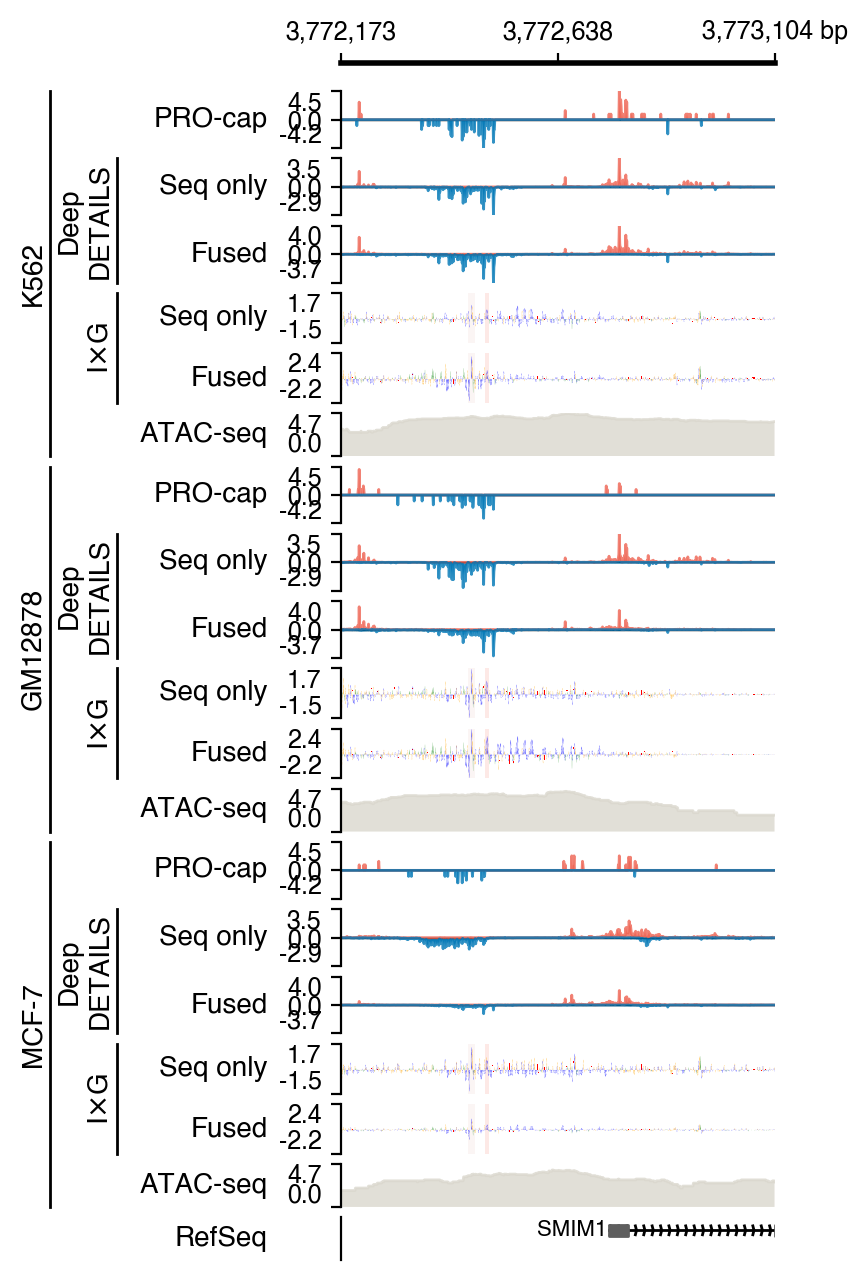

In [5]:
gv_obj.plot("chr1", 3772173, 3773104, fig_width=2.8, height_scale_factor=0.55, hide_chromosome_name=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

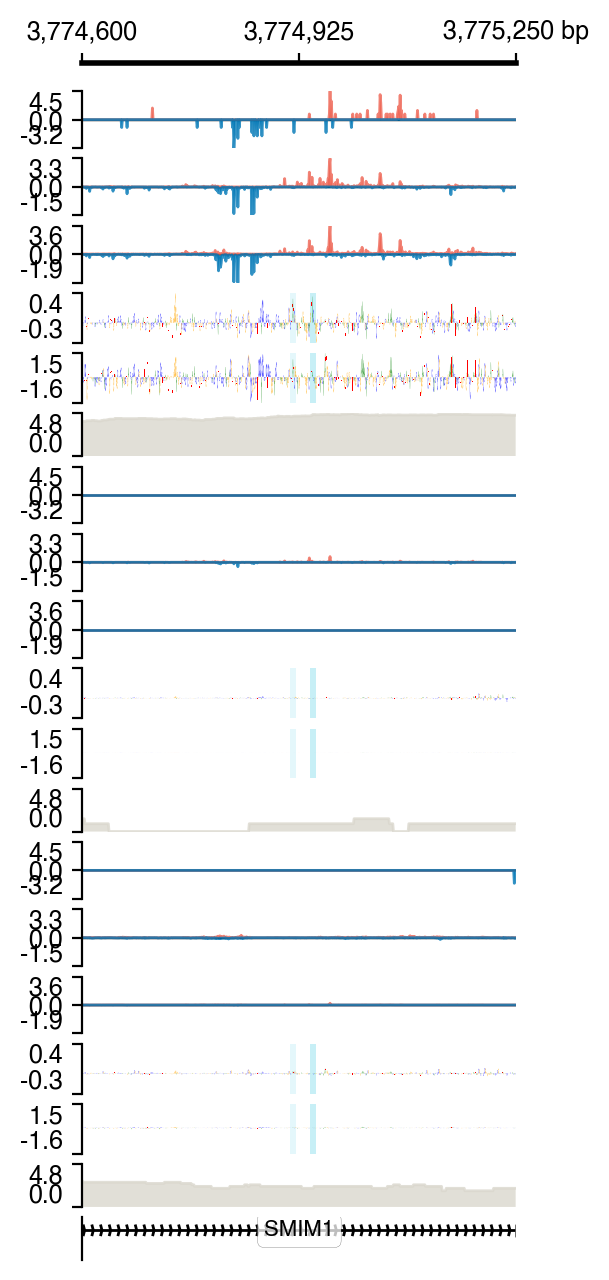

In [6]:
rgv_obj.plot("chr1", 3774600, 3775250, fig_width=2.8, height_scale_factor=0.55, hide_chromosome_name=True)

array([<Axes: ylabel='PRO-cap'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='ATAC-seq'>,
       <Axes: ylabel='PRO-cap'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='ATAC-seq'>,
       <Axes: ylabel='PRO-cap'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='ATAC-seq'>,
       <Axes: ylabel='RefSeq'>], dtype=object)

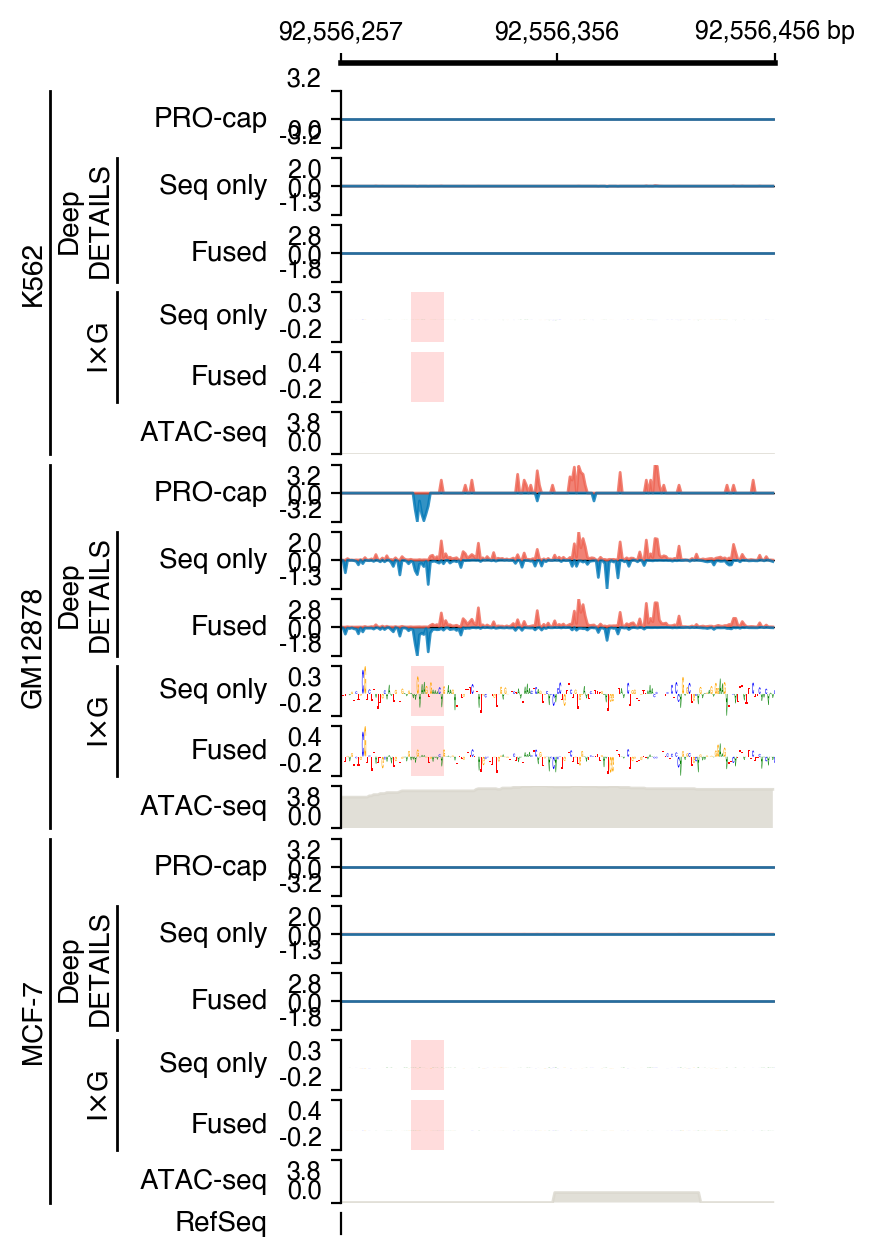

In [7]:
gv_obj.plot("chr12", 92556257, 92556456, fig_width=2.8, height_scale_factor=0.55, hide_chromosome_name=True)

In [ ]:
sgv_obj = GenomeViewer(inward_ticks=True, n_ticks=3)
_cell_labels = ("K562", "GM12878", "MCF7")
j = 1
idxs = (0, 1, 2)
for i, label in enumerate(_cell_labels):
    _target = bigwig_track.PairedStrandSpecificTracks(
        get_bioqueue_file("{{History:12347-%s.ds.pl.bw}}" % label),
        get_bioqueue_file("{{History:12347-%s.ds.mn.bw}}" % label),
        name="PRO-cap", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", height=0.8, 
    )
    if j: _target.data_transform = "asinh"
    sgv_obj.add_track(_target)
    
    _pred = bigwig_track.PairedStrandSpecificTracks(
        (
            get_bioqueue_file("{{History:18785-log_r1/%s.pl.bw}}" % label.lower()),
            get_bioqueue_file("{{History:18785-log_r2/%s.pl.bw}}" % label.lower()),
            get_bioqueue_file("{{History:18785-log_r3/%s.pl.bw}}" % label.lower()),
        ), 
        (
            get_bioqueue_file("{{History:18785-log_r1/%s.mn.bw}}" % label.lower()),
            get_bioqueue_file("{{History:18785-log_r2/%s.mn.bw}}" % label.lower()),
            get_bioqueue_file("{{History:18785-log_r3/%s.mn.bw}}" % label.lower()),
        ),
        name="Seq only", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", height=0.8, 
    )
    if j: _pred.data_transform = "asinh"
    sgv_obj.add_track(_pred)

    _pred = bigwig_track.PairedStrandSpecificTracks(
        (
            get_bioqueue_file("{{History:18787-log_r1/%s.pl.bw}}" % label.lower()),
            get_bioqueue_file("{{History:18787-log_r2/%s.pl.bw}}" % label.lower()),
            get_bioqueue_file("{{History:18787-log_r3/%s.pl.bw}}" % label.lower()),), 
        (
            get_bioqueue_file("{{History:18787-log_r1/%s.mn.bw}}" % label.lower()),
            get_bioqueue_file("{{History:18787-log_r2/%s.mn.bw}}" % label.lower()),
            get_bioqueue_file("{{History:18787-log_r3/%s.mn.bw}}" % label.lower()),
        ),
        name="Fused", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", height=0.8, 
    )

    if j: _pred.data_transform = "asinh"
    sgv_obj.add_track(_pred)

    _motif = logo_track.DynseqTrack(
        (
            get_bioqueue_file("{{History:20191-attr/ixg-v020-3d1-procap-all-seqonly.C%d.bw}}" % i),
            get_bioqueue_file("{{History:20192-attr/ixg-v020-3d1-procap-all-seqonly-r1.C%d.bw}}" % i),
            get_bioqueue_file("{{History:20193-attr/ixg-v020-3d1-procap-all-seqonly-r2.C%d.bw}}" % i),
        ),
        "/media/volume/sdb/refs/sequences/human/GRCh38_no_alt_analysis_set_GCA_000001405.15.22X.fasta",
        name="Seq only", line_width=0, height=0.7, y_tick_format="{:0.1f}")
    _motif.data_transform = "asinh"
    sgv_obj.add_track(_motif)

    _motif.set_highlight_regions(
        [
            61967627, # CA
            61967653, # TATA
        ], 
        [
            61967634, # CA
            61967661, # TATA
        ],
        ["#83C5BE","#e0e1dd",]
    )
    
    _motif = logo_track.DynseqTrack(
        (
            get_bioqueue_file("{{History:20205-attr/ixg-v020-3d1-procap-all.C%d.bw}}" % i),
            get_bioqueue_file("{{History:20206-attr/ixg-v020-3d1-procap-all-r1.C%d.bw}}" % i),
            get_bioqueue_file("{{History:20207-attr/ixg-v020-3d1-procap-all-r2.C%d.bw}}" % i),
        ),
        "/media/volume/sdb/refs/sequences/human/GRCh38_no_alt_analysis_set_GCA_000001405.15.22X.fasta",
        name="Fused", line_width=0, height=0.7, y_tick_format="{:0.1f}")
    _motif.data_transform = "asinh"
    sgv_obj.add_track(_motif)

    _motif.set_highlight_regions(
        [
            61967627, # CA
            61967653, # TATA
        ], 
        [
            61967634, # CA
            61967661, # TATA
        ],
        ["#83C5BE","#e0e1dd",]
    )
    
    acc = bigwig_track.BigWigTrack(get_bioqueue_file("{{History:12347-atac_ds.%s.bw}}" % {label}), 
                      name="ATAC-seq", color="#dad7cd", y_tick_format="{:0.1f}", height=0.6, )
    acc.data_transform = "asinh"
    sgv_obj.add_track(acc)

annot = bed_track.BedTrack(
        "/local/storage/ly349/projects/Deconvolution/Data/Refs/ncbi_refseq.ucsc020724.longest.bed.gz", 
        height=0.3, show_name=True, name="RefSeq", font_size=8)
annot.edge_color = "#5E5E5E"
annot.color = "#5E5E5E"
annot.allowed_feature_lanes = 1
sgv_obj.add_track(annot)

sgv_obj.add_group_autoscale([0, 6, 12])
sgv_obj.add_group_autoscale([4, 10, 16])
sgv_obj.add_group_autoscale([5, 11, 17])

sgv_obj.add_group_label(0, 5, "K562", -0.41)
sgv_obj.add_group_label(6, 11, "GM12878", -0.41)
sgv_obj.add_group_label(12, 17, "MCF-7", -0.41)

sgv_obj.add_group_label(1, 2, "Deep\nDETAILS\n", -0.29)
sgv_obj.add_group_label(3, 4, "I"+r"$\times$"+"G", -0.29)

sgv_obj.add_group_label(7, 8, "Deep\nDETAILS\n", -0.29)
sgv_obj.add_group_label(9, 10, "I"+r"$\times$"+"G", -0.29)

sgv_obj.add_group_label(13, 14, "Deep\nDETAILS\n", -0.29)
sgv_obj.add_group_label(15, 16, "I"+r"$\times$"+"G", -0.29)

array([<Axes: ylabel='PRO-cap'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='ATAC-seq'>,
       <Axes: ylabel='PRO-cap'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='ATAC-seq'>,
       <Axes: ylabel='PRO-cap'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='Seq only'>,
       <Axes: ylabel='Fused'>, <Axes: ylabel='ATAC-seq'>,
       <Axes: ylabel='RefSeq'>], dtype=object)

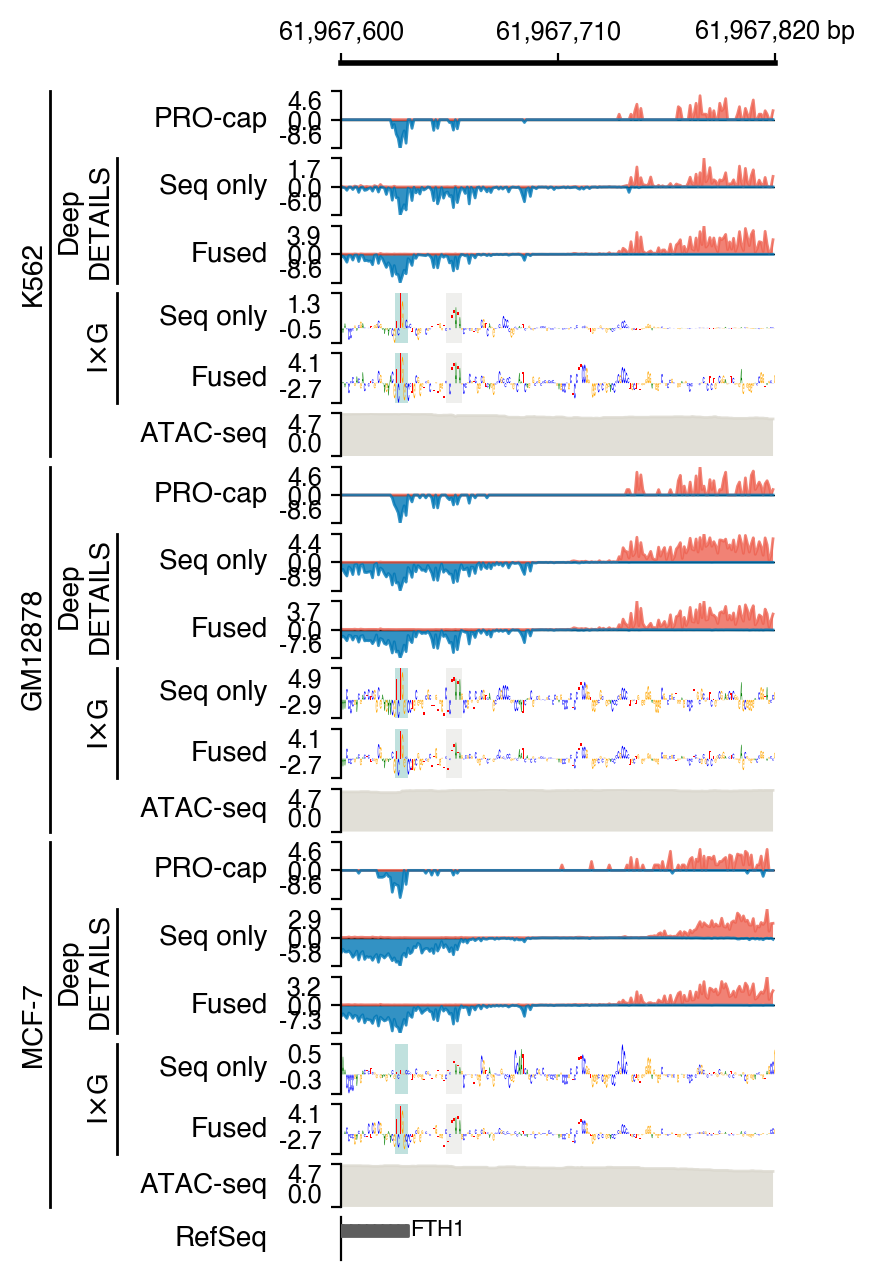

In [9]:
sgv_obj.plot("chr11", 61967600, 61967820, fig_width=2.8, height_scale_factor=0.55, hide_chromosome_name=True)

In [ ]:
mgv = GenomeViewer(inward_ticks=True, n_ticks=4)
_cell_labels = ("K562", "GM12878", "MCF7")
j = 1
idxs = (0, 1, 2)
for i, label in enumerate(_cell_labels):
    _motif = logo_track.DynseqTrack(
        (
            get_bioqueue_file("{{History:18791-attr/ixg-v020-3d1-procap-all-seqonly-counts.C%d.bw}}" % i),
            get_bioqueue_file("{{History:18792-attr/ixg-v020-3d1-procap-all-seqonly-counts-r1.C%d.bw}}" % i),
            get_bioqueue_file("{{History:18793-attr/ixg-v020-3d1-procap-all-seqonly-counts-r2.C%d.bw}}" % i),
        ),
        "/media/volume/sdb/refs/sequences/human/GRCh38_no_alt_analysis_set_GCA_000001405.15.22X.fasta",
        name="", show_range=False, show_name=False, hide_left_spine=True)
    _motif.set_highlight_regions(
        [
            3772445, # ETS hit
            3772481, # SP1 hit
            3774900, # GATA hit 1
            3774940, # GATA hit 2
            92556289, # IRF
        ], 
        [
            3772460, # ETS hit
            3772491, # SP1 hit
            3774919, # GATA hit 1
            3774949, # GATA hit 2
            92556304, # IRF
        ],
        ["#f8edeb","#fcd5ce","#caf0f8","#90e0ef", "#FFBABA"]
    )
    mgv.add_track(_motif)
    _motif = logo_track.DynseqTrack(
        (
            get_bioqueue_file("{{History:18804-attr/ixg-v020-3d1-procap-all-counts.C%d.bw}}" % i),
            get_bioqueue_file("{{History:18805-attr/ixg-v020-3d1-procap-all-counts-r1.C%d.bw}}" % i),
            get_bioqueue_file("{{History:18806-attr/ixg-v020-3d1-procap-all-counts-r2.C%d.bw}}" % i),
        ),
        "/media/volume/sdb/refs/sequences/human/GRCh38_no_alt_analysis_set_GCA_000001405.15.22X.fasta",
        name="", show_range=False, hide_left_spine=True)
    _motif.set_highlight_regions(
        [
            3772445, # ETS hit
            3772481, # SP1 hit
            3774900, # GATA hit 1
            3774940, # GATA hit 2
            92556289, # IRF
        ], 
        [
            3772460, # ETS hit
            3772491, # SP1 hit
            3774919, # GATA hit 1
            3774949, # GATA hit 2
            92556304, # IRF
            
        ],
        ["#f8edeb","#fcd5ce","#caf0f8","#90e0ef","#FFBABA"]
    )
    mgv.add_track(_motif)

mgv.add_group_autoscale([0, 2, 4])
mgv.add_group_autoscale([1, 3, 5])

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

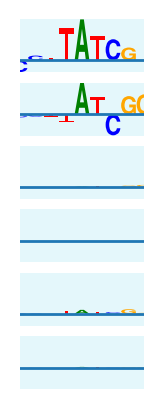

In [11]:
mgv.plot("chr1", 3774911, 3774920, fig_width=0.8, height_scale_factor=0.4, hide_coordinates=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

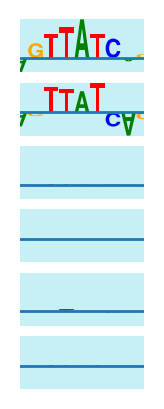

In [12]:
mgv.plot("chr1", 3774940, 3774949, fig_width=0.8, height_scale_factor=0.4, hide_coordinates=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

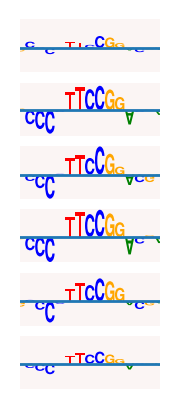

In [13]:
mgv.plot("chr1", 3772445, 3772460, fig_width=0.9, height_scale_factor=0.4, hide_coordinates=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

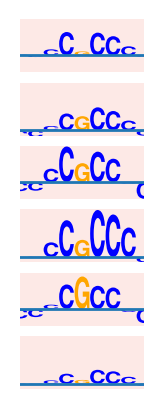

In [14]:
mgv.plot("chr1", 3772481, 3772490, fig_width=0.8, height_scale_factor=0.4, hide_coordinates=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

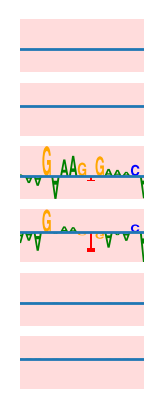

In [15]:
mgv.plot("chr12", 92556289, 92556304, fig_width=0.8, height_scale_factor=0.4, hide_coordinates=True)

In [ ]:
msgv_obj = GenomeViewer(inward_ticks=True, n_ticks=3)
_cell_labels = ("K562", "GM12878", "MCF7")
j = 1
idxs = (0, 1, 2)
for i, label in enumerate(_cell_labels):
    _motif = logo_track.DynseqTrack(
        (
            get_bioqueue_file("{{History:20191-attr/ixg-v020-3d1-procap-all-seqonly.C%d.bw}}" % i),
            get_bioqueue_file("{{History:20192-attr/ixg-v020-3d1-procap-all-seqonly-r1.C%d.bw}}" % i),
            get_bioqueue_file("{{History:20193-attr/ixg-v020-3d1-procap-all-seqonly-r2.C%d.bw}}" % i),
        ),
        "/media/volume/sdb/refs/sequences/human/GRCh38_no_alt_analysis_set_GCA_000001405.15.22X.fasta",
        name="", show_range=False, line_width=0, height=0.7, y_tick_format="{:0.1f}", hide_left_spine=True)
    msgv_obj.add_track(_motif)

    _motif.set_highlight_regions(
        [
            61967627, # CA
            61967653, # TATA
        ], 
        [
            61967634, # CA
            61967661, # TATA
        ],
        ["#83C5BE","#e0e1dd",]
    )
    
    _motif = logo_track.DynseqTrack(
        (
            get_bioqueue_file("{{History:20205-attr/ixg-v020-3d1-procap-all.C%d.bw}}" % i),
            get_bioqueue_file("{{History:20206-attr/ixg-v020-3d1-procap-all-r1.C%d.bw}}" % i),
            get_bioqueue_file("{{History:20207-attr/ixg-v020-3d1-procap-all-r2.C%d.bw}}" % i),
        ),
        "/media/volume/sdb/refs/sequences/human/GRCh38_no_alt_analysis_set_GCA_000001405.15.22X.fasta",
        name="", show_range=False, line_width=0, height=0.7, y_tick_format="{:0.1f}", hide_left_spine=True)
    msgv_obj.add_track(_motif)

    _motif.set_highlight_regions(
        [
            61967627, # CA
            61967653, # TATA
        ], 
        [
            61967634, # CA
            61967661, # TATA
        ],
        ["#83C5BE","#e0e1dd",]
    )

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

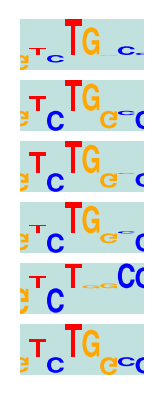

In [17]:
msgv_obj.plot("chr11", 61967627, 61967635, fig_width=0.8, height_scale_factor=0.55, hide_coordinates=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

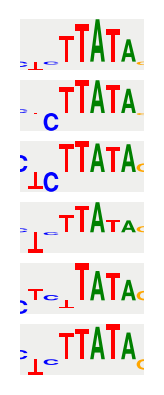

In [18]:
msgv_obj.plot("chr11", 61967653, 61967662, fig_width=0.8, height_scale_factor=0.55, hide_coordinates=True)